# Our Approach

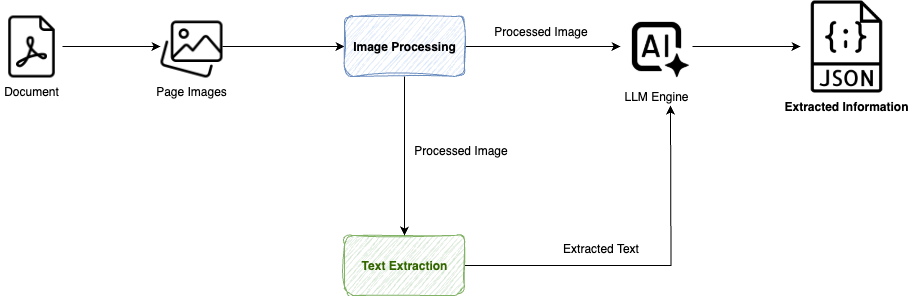

# The Resumes Dataset

## Getting the data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


In [ ]:
import os
file_paths = []
for file_ in os.listdir('/kaggle/input/resume-dataset/data/data/ACCOUNTANT')[:20]:
  file_paths.append('/kaggle/input/resume-dataset/data/data/ACCOUNTANT/'+file_)
file_paths

['/kaggle/input/resume-dataset/data/data/ACCOUNTANT/27558837.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/25547145.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/28298773.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/22465498.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/15363277.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/21853199.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/19446337.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/15289348.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/23734441.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/23636277.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/49997097.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/27573855.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/21338490.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/18365791.pdf',
 '/kaggle/input/resume-dataset/data/data/ACCOUNTANT/25462793.p

### We have to convert the pdf to images

In [ ]:
pip install pdf2image pillow

In [ ]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.11 [186 kB]
Fetched 186 kB in 0s (767 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.11_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.11) ...
Setting up poppler-utils (22.02.0-2ubuntu0.11) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
from pdf2image import convert_from_path
for pdf_path in file_paths:
  pages = convert_from_path(pdf_path, dpi=300)
  file_name = pdf_path.split('.')[0].split('/')[-1]
  for i, page in enumerate(pages):
      if i == 0:
        image_path = f"{file_name}_page_{i+1}.jpg"
        page.save(image_path, "JPEG")
        print(f"Saved: {image_path}")

Saved: 27558837_page_1.jpg
Saved: 25547145_page_1.jpg
Saved: 28298773_page_1.jpg
Saved: 22465498_page_1.jpg
Saved: 15363277_page_1.jpg
Saved: 21853199_page_1.jpg
Saved: 19446337_page_1.jpg
Saved: 15289348_page_1.jpg
Saved: 23734441_page_1.jpg
Saved: 23636277_page_1.jpg
Saved: 49997097_page_1.jpg
Saved: 27573855_page_1.jpg
Saved: 21338490_page_1.jpg
Saved: 18365791_page_1.jpg
Saved: 25462793_page_1.jpg
Saved: 12780508_page_1.jpg
Saved: 18569929_page_1.jpg
Saved: 26975573_page_1.jpg
Saved: 28359817_page_1.jpg
Saved: 18132924_page_1.jpg


In [ ]:
image_paths = []
for file_ in os.listdir('/content'):
  if file_.endswith('.jpg'):
    image_paths.append('/content/'+file_)
print(len(image_paths))
image_paths

20


['/content/27558837_page_1.jpg',
 '/content/21338490_page_1.jpg',
 '/content/28359817_page_1.jpg',
 '/content/49997097_page_1.jpg',
 '/content/23636277_page_1.jpg',
 '/content/21853199_page_1.jpg',
 '/content/12780508_page_1.jpg',
 '/content/19446337_page_1.jpg',
 '/content/26975573_page_1.jpg',
 '/content/22465498_page_1.jpg',
 '/content/15363277_page_1.jpg',
 '/content/18569929_page_1.jpg',
 '/content/27573855_page_1.jpg',
 '/content/25547145_page_1.jpg',
 '/content/15289348_page_1.jpg',
 '/content/28298773_page_1.jpg',
 '/content/23734441_page_1.jpg',
 '/content/25462793_page_1.jpg',
 '/content/18365791_page_1.jpg',
 '/content/18132924_page_1.jpg']

## Image Preprocesing: OpenCV

In [ ]:
! pip install opencv-python matplotlib numpy

Let's take one image and play with it.

In [ ]:
one_image_path = image_paths[1]

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

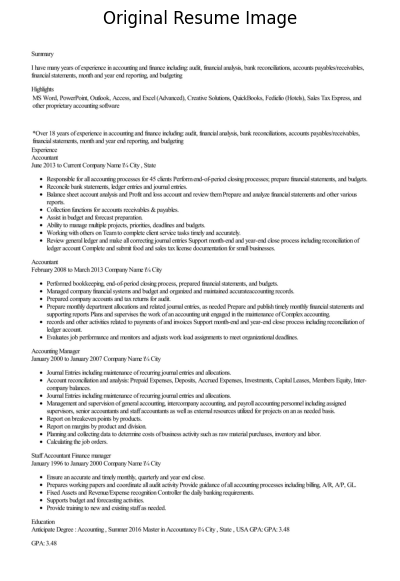

In [ ]:
one_image = cv2.imread(one_image_path)
display_image(one_image, "Original Resume Image")

### Grayscale Conversion

**Why?** Color information is usually not necessary for reading the text on a receipt. Converting the image to grayscale simplifies it from three color channels (Red, Green, Blue) to a single channel (intensity/brightness). This reduces computational complexity and is a required first step for many subsequent operations like thresholding.

In [ ]:
# Convert the image to grayscale
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

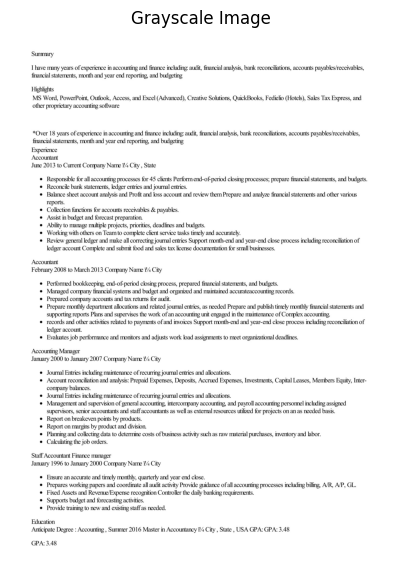

In [ ]:
grayscale_image = convert_to_grayscale(one_image)
display_image(grayscale_image, "Grayscale Image")

### Noise (blur) Reduction
**Why?** Scanned images or photos often contain "noise" (random variations in brightness or color). This can look like small specks or graininess, which can confuse OCR algorithms. Applying a slight blur helps to smooth out this noise. A **Gaussian blur** is a common choice as it effectively averages out pixel values with a weighted average, preserving edges better than a simple blur.

In [ ]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

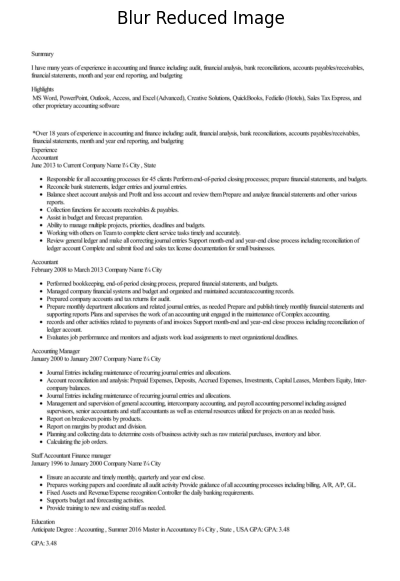

In [ ]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

### Binarization (Thresholding)

**Why?** This is one of the most critical steps. Binarization converts the grayscale image into a pure black-and-white image. The goal is to make the text **black** and the background **white**. However, receipts often have uneven lighting or shadows, so a simple (global) threshold won't work well. We use **adaptive thresholding**, which calculates a different threshold for smaller regions of the image, making it robust to lighting changes.

`cv2.adaptiveThreshold()`:

  * `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Calculates the threshold for a pixel based on a weighted sum of neighborhood values.
  * `cv2.THRESH_BINARY_INV`: Inverts the result. We want the text to be white pixels (value 255) and the background black (value 0) for the next step (skew correction), which often works by finding white pixel contours.
  * `11`: The size of the neighborhood area (block size).
  * `4`: A constant subtracted from the mean. It's a fine-tuning parameter.

In [ ]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, # Invert the colors (text becomes white because of matplotlib)
    11, # Block size
    4  # Constant C
  )

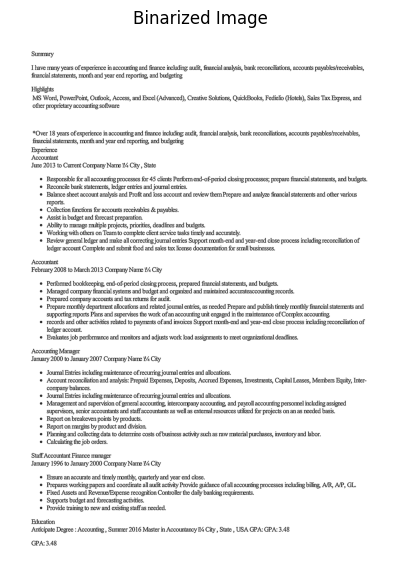

In [ ]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

### Skew Correction

**Why?** Receipts are often scanned or photographed at a slight angle. This skew can significantly reduce the accuracy of OCR. We need to detect this angle and rotate the image to make the text perfectly horizontal.

A common technique is to find the angle of the minimum-area bounding box that encloses all the text (the white pixels in our binarized image) and then rotate the original image by that angle.

In [ ]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [ ]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: 0.00 degrees


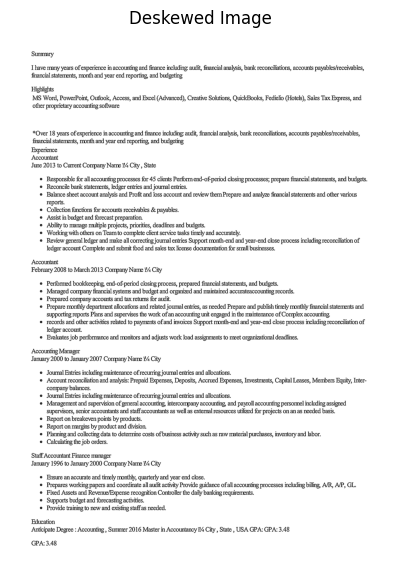

In [ ]:
display_image(deskewed_image, "Deskewed Image")

Let's run the above code for all images

In [ ]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  print("Converted image to grayscale..")
  image = reduce_noise(image)
  print("Reduced noise in the image..")
  image = binarize_image(image)
  print("Binarized the image..")
  image = deskew_image(image)
  print("Corrected image orientation..")
  return image

In [ ]:
import time
output_folder_path = "/content/processed_images"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

for image_path in image_paths:
  image_name = image_path.split('/')[-1]
  print(f"Processing image: {image_name}")
  image = cv2.imread(image_path)
  processed_image = process_one_image(image)
  # save image
  output_path = os.path.join(output_folder_path, image_name)
  cv2.imwrite(output_path, processed_image)
  print(f"Saved processed image to: {output_path}")
  print("-"*50)

print("Processing images is completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Processing image: 27558837_page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/27558837_page_1.jpg
--------------------------------------------------
Processing image: 21338490_page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/21338490_page_1.jpg
--------------------------------------------------
Processing image: 28359817_page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/28359817_page_1.jpg
--------------------------------------------------
Processing image: 49997097_page_1.jpg
Converted image to grayscale..
Reduced no

## Text Extraction: Tesseract

In [ ]:
! pip install pytesseract pillow

In [ ]:
from PIL import Image
import pytesseract

pytesseract.image_to_string(Image.open('/content/processed_images/12780508_page_1.jpg'))

"ACCOUNTANT I\nAccomplishments\n\n° Military Training Certificate, 2005; PNC Conversation: Deep Dive into Savings and Investment training 2012; Operational and Soundness\nTraining 2013; Employee of the month (November) at PNC Bank 2011; Employee of the Quarter at PNC Bank 2011; Retail Banking\nAchievement Award 2012;.\n\n° NMLS- Nationwide Mortgage Licensing System, 2013.\n\n© Supervision\nSupervised team of two staff members.A\n\nProfessional Summary\n\nDetail-oriented Accountant with 5 years effectively maintaining accurate accounting information for large-scale financial organizations.\n\nSkills\n© Superior attention to detail . . .\n: . . e Accounting operations professional\nn aro CRE MAY Gash flow aoabsis ,\nao ihe makes expert . © Data trending knowledge\n° Selfmotivated professional Advanced bookkeeping skill\n\n© Strong communication skills\n\nWork History\nAccountant II, 02/2017 to Current\nCompany Name 4€“ City , State\n\n© Responsible for preparing and posting entries for t

In [ ]:
from PIL import Image
import pytesseract
import time

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print("Extracting text from image..")
  text = pytesseract.image_to_string(Image.open(image_path))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".txt"))
  with open(output_path, "w") as f:
    f.write(text)

  print(f"Saved extracted text to {output_path}")
  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: 27558837_page_1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/27558837_page_1.txt
--------------------------------------------------
Processing image 2/20: 21338490_page_1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/21338490_page_1.txt
--------------------------------------------------
Processing image 3/20: 28359817_page_1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/28359817_page_1.txt
--------------------------------------------------
Processing image 4/20: 49997097_page_1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/49997097_page_1.txt
--------------------------------------------------
Processing image 5/20: 23636277_page_1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/23636277_page_1.txt
--------------------------------------------------
Processi

## Information Extraction

In [ ]:
prompt = """
Extract the information from the given image.
Information to be extracted: profession, latest job role, latest company, top 3 skills (if present).
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "profession": "PROFESSION_NAME",
    "latest_job_role": "LATEST_JOB_ROLE",
    "latest_company": "LATEST_COMPANY",
    "top_3_skills": "TOP_3_SKILLS",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the text extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified format.
Here is the text:


"""

Can we improve the prompt using the [Unified Framework For An Effective Prompt](https://www.geeksforgeeks.org/data-science/a-unified-framework-for-an-effective-prompt/)?

In [ ]:
from google import genai
from google.colab import userdata # colab only code
from PIL import Image
import json
import time

In [ ]:
genai_client = genai.Client(api_key=userdata.get('GEMINI_API_KEY'))

In [ ]:
image_folder_path = "/content/processed_images"
text_folder_path = "/content/tesseract_output"
output_folder_path = "/content/json_output"

start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(image_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print(f"Loading image: {image_path}")
  with open(image_path, "rb") as f:
    image = Image.open(image_path)
    # print(image)


  text_path = os.path.join(text_folder_path, image_name.replace(".jpg", ".txt"))
  print(f"Loading extracted text: {text_path}")
  with open(text_path, "r") as f:
    text = f.read()

  print("Extracting information from image and text..")

  prompt = prompt + text



  contents = [
        image,
        {
            "text": prompt
        }
    ]
  response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)

  # Access the usage_metadata attribute
  usage_metadata = response.usage_metadata

  # Print the different token counts
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  extracted_information = json.loads(response.text.replace('```json', '').replace('```', ''))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".json"))
  with open(output_path, "w") as f:
    json.dump(extracted_information, f, indent=4)

  print(f"Saved extracted information to {output_path}")
  print("-"*50)
  time.sleep(60)

print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 20
Processing image 1/20: 27558837_page_1.jpg
Loading image: /content/processed_images/27558837_page_1.jpg
Loading extracted text: /content/tesseract_output/27558837_page_1.txt
Extracting information from image and text..
Input Token Count: 1472
Thoughts Token Count: 1156
Output Token Count: 63
Total Token Count: 2691
Saved extracted information to /content/json_output/27558837_page_1.json
--------------------------------------------------
Processing image 2/20: 21338490_page_1.jpg
Loading image: /content/processed_images/21338490_page_1.jpg
Loading extracted text: /content/tesseract_output/21338490_page_1.txt
Extracting information from image and text..
Input Token Count: 2252
Thoughts Token Count: 1152
Output Token Count: 60
Total Token Count: 3464
Saved extracted information to /content/json_output/21338490_page_1.json
--------------------------------------------------
Processing image 3/20: 28359817_page_1.jpg
Loading image: /content/processed_images/2835981

### Example

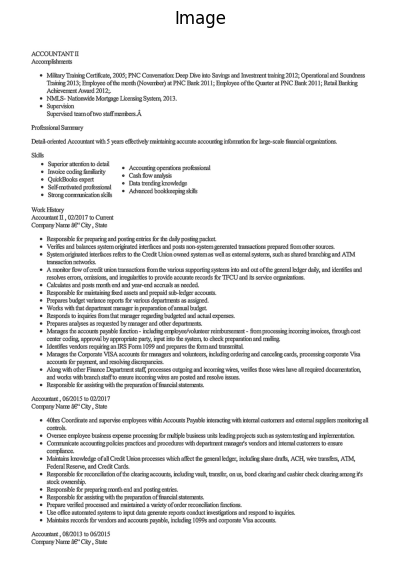

{'profession': 'ACCOUNTANT',
 'latest_job_role': 'Accountant II',
 'latest_company': 'Company Name',
 'top_3_skills': 'Superior attention to detail, Invoice coding familiarity, QuickBooks expert'}

In [39]:
one_image = cv2.imread('/content/processed_images/12780508_page_1.jpg')
display_image(one_image)
print()
with open('/content/json_output/12780508_page_1.json', 'r') as file:
    data = json.load(file)
data